# Multidimensional Scaling

<i>Steven Mancell and Clayton Deutsch, 2019</i>

This notebook implements the Geostatistics Lesson <a href="http://geostatisticslessons.com/lessons/mds">Multidimensional Scaling</a>. This code is provided for educational purposes and should be reviewed jointly with the lesson. 

Learning Objectives:
- Appreciate high dimensional distance calculations with geological data
- Understand multidimensional scaling (MDS) within the framework of multivariate geostatistics
- Interpret results from MDS to help understand multivariate data

These examples are strictly for educational purposes and should not be misconstrued as financial or professional advice.

In [1]:
print('Package Versions:')
import sys; print("  python:", sys.version_info)
import pandas as pd; print("  pandas:", pd.__version__)
import numpy as np; print("  numpy:", np.__version__)
import matplotlib as mpl; print("  matplotlib:", mpl.__version__)
import seaborn as sns; print("  seaborn:", sns.__version__)
import sklearn; print("  sklearn:", sklearn.__version__)

from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
    
%matplotlib inline

Package Versions:
  python: sys.version_info(major=3, minor=7, micro=1, releaselevel='final', serial=0)
  pandas: 0.23.4
  numpy: 1.15.4
  matplotlib: 3.0.2
  seaborn: 0.9.0
  sklearn: 0.20.1


# Load Reported 2017 Mining Company Data

In [2]:
df = pd.read_csv('./mining_company_data.csv')
df.rename(columns=dict([(col, col.strip()) for col in df.columns]), inplace=True)
df.describe()

,Share Price,Earnings,Earnings/Share,Cashflow,Market Cap,Gold Production,AISC,Cash Cost,Reserve,Grade,Revenue,Shares Out
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,6.395000,180.421429,0.006429,126.100000,1843.542857,488.071429,873.714286,614.357143,9.390000,3.415714,612.578571,371.664286
std,4.127575,187.294746,0.645405,168.905413,832.543666,238.081907,126.420804,143.650541,5.311555,4.373785,307.069815,235.714605
min,2.380000,-108.000000,-1.730000,-172.200000,678.600000,145.000000,617.000000,347.000000,2.700000,0.700000,178.000000,120.000000
25%,2.987500,28.225000,-0.005000,44.450000,1099.275000,312.250000,822.000000,517.250000,4.920000,1.215000,405.800000,189.675000
50%,5.610000,173.750000,0.060000,106.500000,1761.750000,501.000000,898.500000,635.000000,8.075000,1.460000,656.200000,309.000000
75%,8.505000,253.250000,0.325000,279.000000,2431.050000,621.500000,958.750000,712.750000,14.650000,3.227500,745.375000,452.450000
max,15.360000,501.600000,0.720000,357.600000,3220.400000,882.000000,1064.000000,835.000000,17.300000,15.500000,1200.000000,990.000000


## Standardize and Scale the Data

In [3]:
companies = df['Ticker'].tolist()
print('Companies:', ', '.join(companies))
df.drop(columns=['Ticker'], inplace=True)

variables = df.columns.tolist()
print('Variables:', ', '.join(variables))

Companies: ACA, AGI, BTG, CG, DGC, EGO, IAG, KL, LMC, NGD, OGC, PVG, SMF, SSRM
Variables: Share Price, Earnings, Earnings/Share, Cashflow, Market Cap, Gold Production, AISC, Cash Cost, Reserve, Grade, Revenue, Shares Out


In [4]:
# Rescale by range
std_scaler = preprocessing.StandardScaler()
df = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns, index=df.index)
df.describe()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Share Price,Earnings,Earnings/Share,Cashflow,Market Cap,Gold Production,AISC,Cash Cost,Reserve,Grade,Revenue,Shares Out
count,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01
mean,-1.110223e-16,-4.361590e-17,-6.344132e-17,3.172066e-17,1.665335e-16,1.110223e-16,4.123686e-16,-2.299748e-16,-9.516197e-17,-2.379049e-17,-2.379049e-17,1.586033e-17
std,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00
min,-1.009446e+00,-1.598064e+00,-2.792009e+00,-1.832745e+00,-1.452078e+00,-1.495376e+00,-2.107288e+00,-1.931421e+00,-1.307064e+00,-6.443458e-01,-1.468668e+00,-1.107969e+00
25%,-8.567089e-01,-8.432789e-01,-1.837604e-02,-5.016548e-01,-9.277150e-01,-7.663687e-01,-4.245065e-01,-7.015139e-01,-8.733296e-01,-5.221540e-01,-6.988126e-01,-8.012198e-01
50%,-1.973636e-01,-3.696456e-02,8.613768e-02,-1.204217e-01,-1.019532e-01,5.635293e-02,2.034582e-01,1.491265e-01,-2.569191e-01,-4.640239e-01,1.474196e-01,-2.758836e-01
75%,5.304932e-01,4.035232e-01,5.122320e-01,9.394123e-01,7.323159e-01,5.815871e-01,6.980317e-01,7.108020e-01,1.027676e+00,-4.465679e-02,4.487884e-01,3.556644e-01
max,2.253968e+00,1.779563e+00,1.147354e+00,1.422328e+00,1.716225e+00,1.717052e+00,1.561996e+00,1.593951e+00,1.545422e+00,2.867186e+00,1.985203e+00,2.722264e+00


# Correlation Matrix of Rescaled Variables

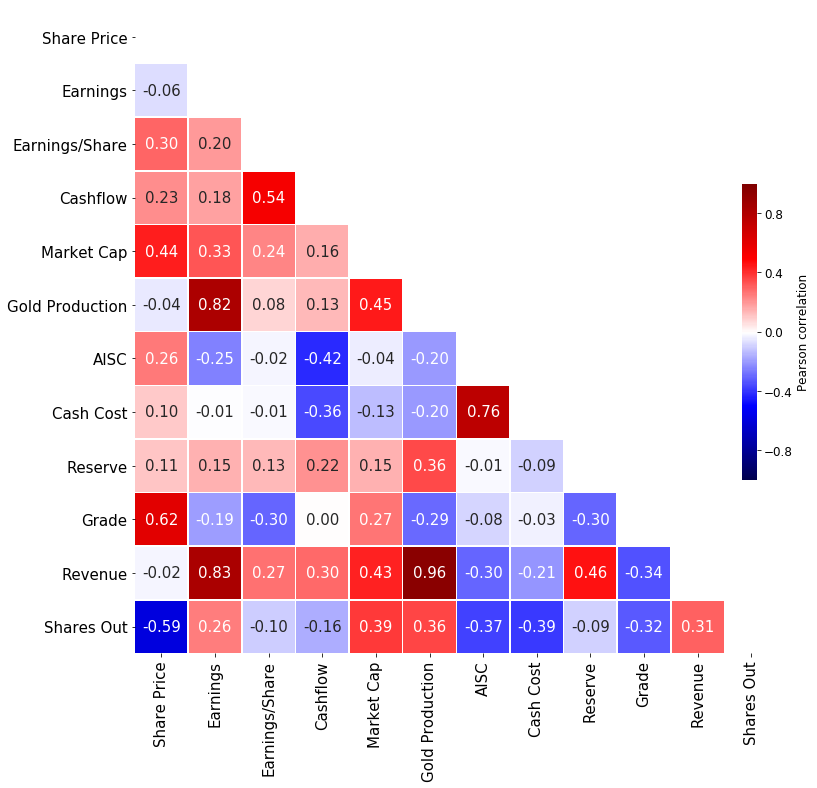

In [5]:
# Calculate correlation matrix
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corrmat, mask=np.triu(np.ones(corrmat.shape)).astype(bool),
                 cmap='seismic', vmax=-1, vmin=1,
                 annot=True, annot_kws={'size': 15.0},
                 fmt='.2f', square=True, linewidths=.5,
                 cbar_kws={'shrink': 0.4, 'pad': -0.05})

# Colorbar
cbar = ax.collections[0].colorbar
cbar.set_label(label='Pearson correlation',size=12)
cbar.ax.tick_params(labelsize=12)
cbar.solids.set_edgecolor("face")

# Ticks
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tick_params(axis='both', labelsize=15)
plt.tight_layout()

plt.savefig('./corrmat.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

# Multidimensional Scaling (MDS)

## 1) Using 1 - Correlation as Distance for MDS

In [6]:
# Distance matrix
corr_dmatrix = 1 - corrmat

model = MDS(n_components=3, dissimilarity='precomputed', random_state=1)
mds_out = model.fit_transform(corr_dmatrix)

x = mds_out[:,0]
y = mds_out[:,1]
z = mds_out[:,2]

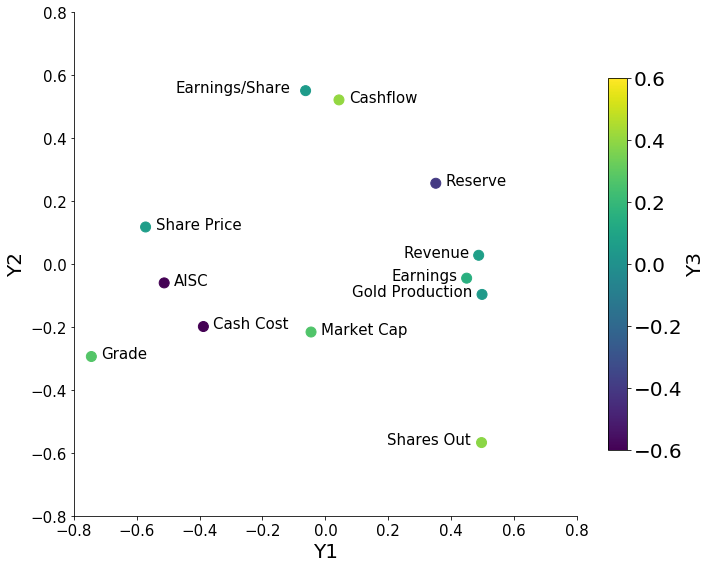

In [7]:
# MDS plot of variables as entities
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect('equal')
plot = ax.scatter(x, y, s=100, c=z, vmin=-0.6, vmax=0.6)

# Shift conflicting labels
for i, txt in enumerate(variables):
    if (txt == 'Revenue' or txt == 'Earnings'):
        ax.annotate(txt, xy=(x[i], y[i]), xytext=(-75, 10),
                    fontsize=15, va='top',
                    xycoords='data', textcoords='offset points')
    elif (txt == 'Shares Out'):
        ax.annotate(txt, xy=(x[i], y[i]), xytext=(-95, 10),
                    fontsize=15, va='top',
                    xycoords='data', textcoords='offset points')
    elif (txt == 'Gold Production' or txt == 'Earnings/Share'):
        ax.annotate(txt, xy=(x[i], y[i]), xytext=(-130, 10),
                    fontsize=15, va='top',
                    xycoords='data', textcoords='offset points')
    else:
        ax.annotate(txt, xy=(x[i], y[i]), xytext=(10, 10),
                    fontsize=15, va='top',
                    xycoords='data', textcoords='offset points')

# Colorbar
cbar = fig.colorbar(plot, pad=0.05, fraction=0.03)
cbar.solids.set_edgecolor("face")
cbar.set_label(label='Y3',size=20)
cbar.ax.tick_params(labelsize=20)

# Ticks and labels
ax.set_xlabel('Y1', fontsize=20)
ax.set_ylabel('Y2', fontsize=20)
ax.set_xlim((-0.8, 0.8))
ax.set_ylim((-0.8, 0.8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tick_params(axis='both', labelsize=15)
plt.tight_layout()

plt.savefig('./mds_sheet_features.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

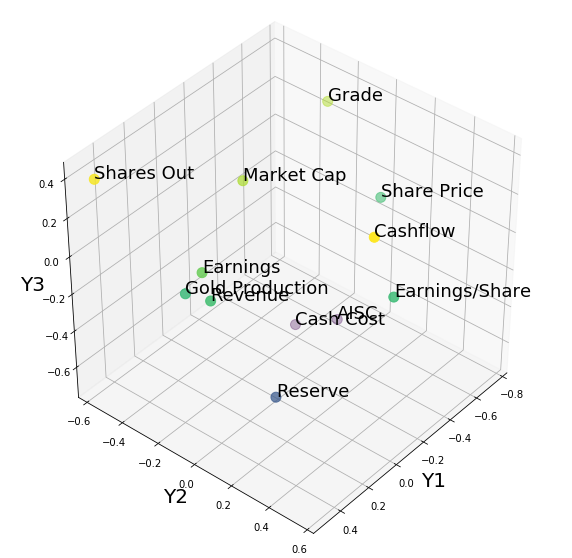

In [8]:
# Oblique view
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z, s=100, c=z)

ax.view_init(azim=40, elev=40)
ax.set_xlabel('Y1', fontsize=20)
ax.set_ylabel('Y2', fontsize=20)
ax.set_zlabel('Y3', fontsize=20)

for i, txt in enumerate(variables):
    ax.text(x[i], y[i], z[i], txt, fontsize=18)

plt.savefig('./mds_sheet_features_oblique.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

## 2) Using Euclidean Distance for MDS

In [9]:
euc_dist = pairwise_distances(df)

euc_model = MDS(n_components=3, dissimilarity='precomputed', random_state=1)
euc_mod_out = euc_model.fit_transform(euc_dist)

x = euc_mod_out[:,0]
y = euc_mod_out[:,1]
z = euc_mod_out[:,2]

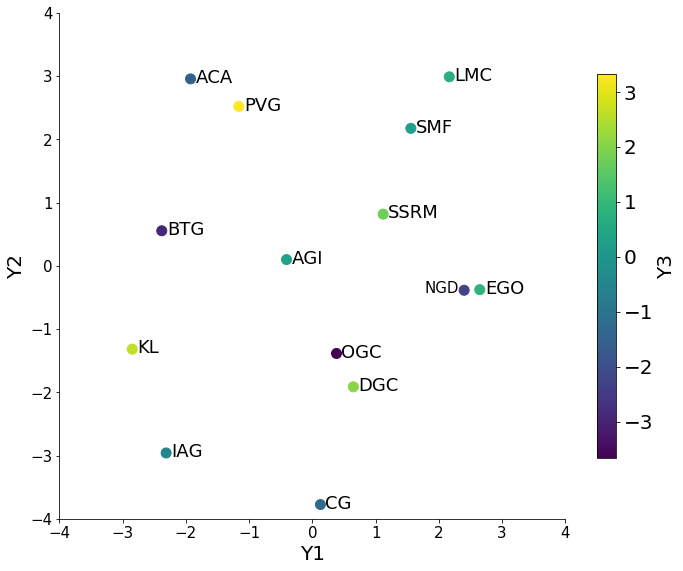

In [10]:
# Plot of MDS for companies 
fig, ax = plt.subplots(figsize=(10,8))
ax.set_aspect('equal')
plot = ax.scatter(x, y, s=100, c=z)

for i, txt in enumerate(companies):
    if (txt == 'NGD'):
        ax.annotate(txt, xy=(x[i], y[i]), xytext=(-40, 10),
                    fontsize=15, va='top',
                    xycoords='data', textcoords='offset points')
    else:
        ax.annotate(txt, (x[i], y[i]), xytext=(5, 10),
                    fontsize=18, va='top',
                    xycoords='data', textcoords='offset points') 
        
cbar = fig.colorbar(plot, pad=0.05, fraction=0.03)
cbar.solids.set_edgecolor("face")
cbar.set_label(label='Y3',size=20)
cbar.ax.tick_params(labelsize=20)

ax.set_xlabel('Y1', fontsize=20)
ax.set_ylabel('Y2', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.tight_layout()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))

plt.savefig('./mds_companies.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

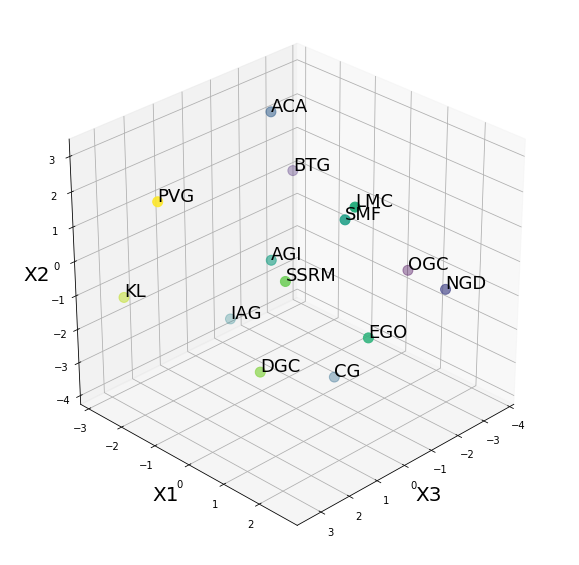

In [11]:
# 3-D View
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter3D(z, x, y, s=100, c=z)

ax.view_init(azim=45, elev=30)
ax.set_xlabel('X3', fontsize=20)
ax.set_ylabel('X1', fontsize=20)
ax.set_zlabel('X2', fontsize=20)
for i, txt in enumerate(companies):
    ax.text(z[i], x[i], y[i], txt, fontsize=18)

plt.savefig('./mds_companies_oblique.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()